In [11]:
import numpy as np
import os
import pandas as pd
import time
import math

# package for io 
from aicsimageio.writers import OmeTiffWriter
from aicsimageio.readers.ome_tiff_reader import OmeTiffReader

from CustomFunctions.abhifuncs import getBounds, abhiparam
import itertools
from skimage import measure as skmeasure
import datetime

# load in some stuff to speed up processing
# (following https://sedeh.github.io/python-pandas-multiprocessing-workaround.html)
import multiprocessing

def collect_results(result):
    """Uses apply_async's callback to setup up a separate Queue for each process.
    This will allow us to collect the results from different threads."""
    results.append(result)
    



In [12]:
########### get all the cells that were not marked as outliers
datadir = 'D:/Aaron/Data/Chemotaxis/Data_and_Figs/'
frame = pd.read_csv(datadir+'Shape_Metrics_outliersremoved.csv')
filelist_fl = [x+'_cell_mesh.vtp' for x in frame.cell.to_list()]


In [4]:
################ get the bounds

results = []
if __name__ ==  '__main__':
# use multiprocessing to perform segmentation and x,y,z determination
    pool = multiprocessing.Pool(processes=60)
    for i in filelist_fl:
        x = meshdir+i
        pool.apply_async(getBounds, args=(x,), callback=collect_results)
    pool.close()
    pool.join()

# Collecting imgBounds of all cells.
allBounds = np.empty(shape=(len(results), 6))

for i,j in enumerate(results):
    allBounds[i, :] = j
maxbounds = []
minbounds = []
for x in range(allBounds.shape[1]):
    minn = allBounds[:,x].min()
    maxx = allBounds[:,x].max()
    if x%2 == 0:
        maxbounds.append(minn)
        minbounds.append(maxx)
    else:
        maxbounds.append(maxx)
        minbounds.append(minn)
        
minbounds, maxbounds


[(-11.172873497009277,
  9.863519668579102,
  -6.71623420715332,
  7.077599048614502,
  -5.294478893280029,
  5.918123722076416),
 (-8.924786567687988,
  9.370604515075684,
  -7.049599647521973,
  7.159982681274414,
  -5.606232643127441,
  5.280350208282471),
 (-9.230283737182617,
  9.71764850616455,
  -6.348169803619385,
  5.035566329956055,
  -5.1219868659973145,
  4.92200231552124),
 (-8.278246879577637,
  6.4718098640441895,
  -8.960963249206543,
  9.487095832824707,
  -7.687209606170654,
  7.464053630828857),
 (-10.826848030090332,
  10.106721878051758,
  -10.027473449707031,
  7.446229457855225,
  -6.815040588378906,
  4.860938549041748),
 (-8.427206993103027,
  8.270885467529297,
  -10.701870918273926,
  8.098014831542969,
  -5.473423957824707,
  5.814671039581299),
 (-7.485294818878174,
  8.637625694274902,
  -7.92531156539917,
  8.072537422180176,
  -5.291563034057617,
  5.343174934387207),
 (-8.971270561218262,
  8.626474380493164,
  -7.4117431640625,
  7.136173725128174,
  -

In [5]:
# Collecting imgBounds of all cells.
allBounds = np.empty(shape=(len(results), 6))

for i,j in enumerate(results):
    allBounds[i, :] = j
maxbounds = []
minbounds = []
for x in range(allBounds.shape[1]):
    minn = allBounds[:,x].min()
    maxx = allBounds[:,x].max()
    if x%2 == 0:
        maxbounds.append(minn)
        minbounds.append(maxx)
    else:
        maxbounds.append(maxx)
        minbounds.append(minn)
        
minbounds, maxbounds

([-4.208667755126953,
  4.5800347328186035,
  -5.179440975189209,
  4.891390800476074,
  -3.50774884223938,
  3.2740166187286377],
 [-22.653474807739258,
  23.1318359375,
  -23.597612380981445,
  23.385591506958008,
  -14.753515243530273,
  16.06416893005371])

In [13]:
########### set params for all of the stuff ##################


radiusDiscretisation = 20 # Number of spheres
N = 100 # Number of samples of theta and phi to reconstruct spheres (total points = N*N).
lmax = 10 # Each sphere is reconstructed to the same value of lmax.
expo = 1.0

sampleSize = (100, 100, 100) # Number of voxels in the volume element.

imgBOunds = [-22.653474807739258,23.1318359375,-23.597612380981445,23.385591506958008,-14.753515243530273,16.06416893005371]
#make image bounds 1% bigger to accomodate for discretization
imgBOunds = np.array(imgBOunds)+np.array(imgBOunds)*0.01

In [ ]:
##############
# the last time I ran this it successfully saved all except ~40 of the recon mesh files
# but when I returned to the computer the screen was black and not responding, needed to restart
# not sure why the multiprocessing didn't finish


# Path to folder which has the input meshes.
# Path to folder which has the input meshes.
fold = 'D:/Aaron/Data/Chemotaxis/Processed_Data/'
meshdir = fold + 'Meshes/'
savedir = fold + f'SDMesh_{radiusDiscretisation}sph_{N}N_{sampleSize[0]}ss/'
if not os.path.exists(savedir):
    os.makedirs(savedir)


start = 0
stop = 60
allresults = []
while stop<len(filelist_fl):
    # "cells" containes the corresponding vedo mesh for each input mesh.
    if __name__ ==  '__main__':
    # use multiprocessing to perform segmentation and x,y,z determination
        results = []
        pool = multiprocessing.Pool(processes=60)
        for i in filelist_fl[start:stop]:
            pool.apply_async(abhiparam, args=(
                            savedir,
                            meshdir,
                            i,
                            sampleSize,
                            imgBOunds,
                            radiusDiscretisation,
                            N,
                            lmax,
                            expo,
                            ), 
                             callback=collect_results)
        pool.close()
        pool.join()
    
        allresults.extend(results)
    
    start = stop + 1
    stop = stop + 60
    if stop>len(filelist_fl):
        stop = len(filelist_fl)

        
clmnames = [f'Clm_{x}' for x in range(len(allresults[0][3]))]
distinfo = []
for r in allresults:
    distinfo.append([r[0], r[1], r[2]])
    distinfo[-1].extend(r[3])
df = pd.DataFrame(distinfo, columns = ['cell', 'OtRdistance', 'RtOdistance']+clmnames)    
df.to_csv(datadir+f'SD_dist_coeff_{radiusDiscretisation}sph_{N}N_{sampleSize[0]}ss.csv')


In [64]:
allresults[0]

NameError: name 'allresults' is not defined

(array([6.100e+01, 1.139e+03, 3.086e+03, 1.101e+03, 2.020e+02, 5.500e+01,
        2.300e+01, 8.000e+00, 4.000e+00, 3.000e+00]),
 array([0.23493407, 0.26533321, 0.29573235, 0.32613148, 0.35653062,
        0.38692976, 0.41732889, 0.44772803, 0.47812716, 0.5085263 ,
        0.53892544]),
 <BarContainer object of 10 artists>)

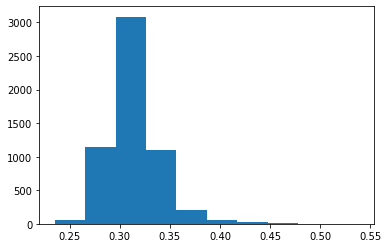

In [19]:
import matplotlib.pyplot as plt
plt.hist(df.RtOdistance)

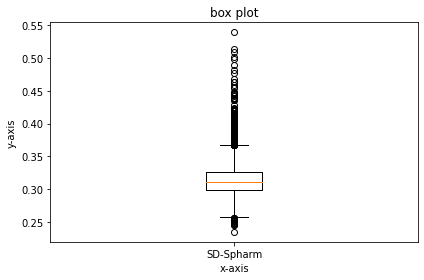

In [24]:
#graph the abhi recons next to tradition spharm
spharm = pd.read_csv(datadir + 'Shape_Metrics_with_Digitized_PCs.csv')

import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# build a box plot
ax.boxplot([df.RtOdistance.to_list()])#, spharm.RtOdistance.to_list()])
xticklabels = ['SD-Spharm']#, 'Spharm']

# title and axis labels
ax.set_title('box plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
# xticklabels=['category 1', 'category 2', 'category 3', 'category 4']
ax.set_xticklabels(xticklabels)

# plt.yscale('log')
plt.tight_layout()
# plt.savefig('D:/Data/RandomWalkConfocal/All_Frames_Cells/AbhiMesh/100spheres40sample10lmaxvslmax10.png')

In [53]:
df.RtOdistance.sort_values(ascending=True).head(500)

20210510_aYmA_CAAXJF647_Hoechst_30C_30s_4_MMStack_Pos0.ome_cell_14_frame_6      0.094244
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_14_MMStack_Pos0.ome_cell_32_frame_8     0.108339
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_9_MMStack_Pos0.ome_cell_2_frame_8       0.114619
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_9_MMStack_Pos0.ome_cell_2_frame_7       0.114803
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_14_MMStack_Pos0.ome_cell_32_frame_2     0.116233
                                                                                  ...   
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_1_MMStack_Pos0.ome_cell_12_frame_11     0.219050
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_1_MMStack_Pos0.ome_cell_18_frame_12     0.219060
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_7_MMStack_Pos0.ome_cell_12_frame_9      0.219092
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_16_MMStack_Pos0.ome_cell_28_frame_19    0.219263
20210510_aYmA_CAAXJF647_Hoechst_30C_30s_18_MMStack_Pos0.ome_cell_22_frame_9     0.219477
Name: RtOdistance, Le

In [13]:
fold = 'D:/Data/RandomWalkConfocal/All_Frames_Cells/AbhiMesh/'
flist = [x for x in os.listdir(fold) if 'csv' in x]
cellinfo = []
for i in flist:
    tc = pd.read_csv(fold+i)

    cellinfo.append([i,tc.iloc[0]])
cellinfo

[['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_2Cell_Mesh.vtpdists.csv',
  OtRdistance    1.230630
  RtOdistance    0.255621
  Name: 0, dtype: float64],
 ['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_3Cell_Mesh.vtpdists.csv',
  OtRdistance    1.349360
  RtOdistance    0.262966
  Name: 0, dtype: float64],
 ['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_4Cell_Mesh.vtpdists.csv',
  OtRdistance    1.234763
  RtOdistance    0.251625
  Name: 0, dtype: float64],
 ['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_5Cell_Mesh.vtpdists.csv',
  OtRdistance    1.123483
  RtOdistance    0.204487
  Name: 0, dtype: float64],
 ['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_6Cell_Mesh.vtpdists.csv',
  OtRdistance    1.228959
  RtOdistance    0.195562
  Name: 0, dtype: float64],
 ['20210510_aYmA_CAAXJF647_Hoechst_30C_30s_10_MMStack_Pos0.ome_cell_11_frame_7Cell_Me

In [35]:
######### Perform PCA and divide cells into shape space bins ################

#import stuff and define functions
from typing import Dict, List, Optional, Union
from pathlib import Path
from sklearn.decomposition import IncrementalPCA, PCA
from CustomFunctions import shapePCAtools
import math
from vtk.util import numpy_support
import vtk
from CustomFunctions import abhifuncs
from vedo import write


folder_fl = 'D:/Aaron/Data/Chemotaxis/'
data_fl = folder_fl + 'Data_and_Figs/'
info_fl = folder_fl + 'Processed_Data/'

#specify number of PCs and number of bins
npcs = 10
nbins = 5
bins = list(range(1,nbins+1))
lmax = 10

#open full dataframe
df = pd.read_csv(data_fl + 'SD_dist_coeff.csv', index_col=0)
#get coefficients
coeff_df = df[[x for x in df.columns.to_list() if 'Clm' in x]]


#add all of the other metrics from the single csv files
cellinfo = pd.DataFrame()
for i in df.index.to_list():
    tc = pd.read_csv(info_fl + i +'_cell_info.csv', index_col = 0)
    cellinfo = cellinfo.append(tc.loc[0])
# Add distance travelled per framerate to total frame
cellinfo.index = cellinfo.cell
df = df.merge(cellinfo.drop(columns=['image', 'x', 'y', 'z', 'cropx (pixels)',
       'cropy (pixels)', 'cropz (pixels)']), left_index = True, right_index = True)

#add all the mesh stats that are normally gotten with regular PCA
meshstats = pd.read_csv(data_fl+"Shape_Metrics.csv", index_col=0)
shcolist = [x for x in meshstats.columns if 'shcoeff' in x]
df = df.merge(meshstats.drop(columns=shcolist), left_index = True, right_index = True)

# Fit and transform the data
pca = PCA(n_components=npcs)
pca = pca.fit(coeff_df)
matrix_of_features_transform = pca.transform(coeff_df)


# Dataframe of transformed variable
pc_names = [f"Cell_PC{c}" for c in range(1, 1 + npcs)]
df_trans = pd.DataFrame(data=matrix_of_features_transform, columns=pc_names, index = coeff_df.index)


# Adjust the sign of PCs so that larger cells are represent by positive values
#need actual volume data to do this so needs to be combined with shape metrics
df_trans['Cell_Volume'] = df.Cell_Volume
for pcid, pc_name in enumerate(pc_names):
    pearson = np.corrcoef(df_trans.Cell_Volume.values, df_trans[pc_name].values)
    if pearson[0, 1] < 0:
        df_trans[pc_name] *= -1
        pca.components_[pcid] *= -1

df_trans = df_trans.drop(columns = 'Cell_Volume')



################ RECONSTRUCT CELLS AT CERTAIN POINTS IN THE "SHAPE SPACE" ##################

df_dig = pd.DataFrame(index = df_trans.index)
for count, col in enumerate(df_trans.columns.to_list()):
    df_digit, bin_indexes, (bin_centers, pc_std) = shapePCAtools.digitize_shape_mode(
        df = df_trans,
        feature = col,
        nbins = nbins,
        filter_based_on = df_trans.columns.to_list(),
        filter_extremes_pct = float(1),
        save = None,
        return_freqs_per_structs = False
    )
    #put bin_indexes into a larger list that I can later iterate through
    df_dig = df_dig.merge(df_digit[[col,'bin']], left_index = True, right_index = True)
    df_dig = df_dig.rename(columns={'bin':f'PC{count+1}_bins'})

    
mid = math.ceil(nbins/2)
recon_PCs = np.zeros((npcs, nbins, npcs))
for pi, p in enumerate(pc_names):
    for c in range(nbins):
        for ni, n in enumerate(pc_names):
            if n == p:
                recon_PCs[pi,c,ni] = df_dig[df_dig[f'PC{ni+1}_bins']==c+1].loc[:,n].mean()
            else:
                recon_PCs[pi,c,ni] = df_dig[df_dig[f'PC{ni+1}_bins']==mid].loc[:,n].mean()

#get inverse pca transform of those values
recon_schoeffs = np.zeros((npcs, nbins, len(coeff_df.columns)))
for o in range(recon_schoeffs.shape[0]):
    for t in range(recon_schoeffs.shape[1]):
            recon_schoeffs[o,t,:] = pca.inverse_transform(recon_PCs[o,t,:])
            
    
#combine metrics and digitized pcs but leave out clm
df_dig = df[[x for x in df.columns.to_list() if'Clm' not in x]].merge(df_dig, left_index = True, right_index = True)
#save
df_dig.to_csv(data_fl+"SD-SPHARM_with_Digitized_PCs.csv")


########### GET RECONSTRUCTIONS OF AVERAGE CELLS FROM SHAPE SPACE BINS ##########################

meshes = {}
aliases = ['Cell']

for pi, p in enumerate(pc_names):
    meshes[p] = {}
    for c in range(nbins):
        meshes[p][bins[c]] = {}
        for i, a in enumerate(aliases):
            meshes[p][bins[c]][a] = abhifuncs.sdspharm_recon(recon_schoeffs[pi,c,:].reshape(radiusDiscretisation,2,lmax,lmax),
                                                    sampleSize,
                                                    imgBOunds,
                                                    radiusDiscretisation,
                                                    N,
                                                    lmax,
                                                    expo,)



################## save PC meshes ##################
savedir = folder_fl + 'SD-SPHARM_PC_Meshes/'
if not os.path.exists(savedir):
    os.makedirs(savedir)
for p in list(meshes):
    for n, b in enumerate(list(meshes[p])):
        for a in list(meshes[p][b]):
            write(meshes[p][b][a], savedir+p+'_'+str(b)+'_'+a+'.vtp')



In [61]:
df

,Unnamed: 0.1,OtRdistance,RtOdistance,Clm_0,Clm_1,Clm_2,Clm_3,Clm_4,Clm_5,Clm_6,...,Clm_3990,Clm_3991,Clm_3992,Clm_3993,Clm_3994,Clm_3995,Clm_3996,Clm_3997,Clm_3998,Clm_3999
20230509_488EGFP-CAAX_640SPY650-DNA1_cell_10_frame_19,0,0.535637,0.298106,-2.576736,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.033418,-0.010418,0.016834,0.088927,0.007881,-0.029629,-0.009775,0.003596,-0.008464
20230509_488EGFP-CAAX_640SPY650-DNA1_cell_10_frame_29,1,0.560468,0.325456,-2.313754,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.008170,-0.029569,0.038835,0.011096,-0.045904,0.034636,0.020166,0.024559,0.011810
20230509_488EGFP-CAAX_640SPY650-DNA1_cell_10_frame_22,2,0.514953,0.303448,-2.213005,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.004171,-0.011922,-0.001835,-0.007822,-0.002037,-0.036221,0.000456,0.002966,0.043353
20230509_488EGFP-CAAX_640SPY650-DNA1_cell_0_frame_27,3,0.588583,0.304662,-1.556417,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.057884,-0.033788,0.047943,-0.021437,-0.008321,0.005552,-0.001051,-0.021363,0.026041
20230509_488EGFP-CAAX_640SPY650-DNA1_cell_0_frame_24,4,0.628625,0.304840,-3.807315,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.019486,-0.045553,0.024384,-0.002260,0.006291,0.027830,0.031170,-0.025991,0.007562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230525_488EGFP-CAAX_560myosin-mApple2_cell_7_frame_49,5677,0.539109,0.301198,-2.353984,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.057100,-0.003796,-0.027316,-0.037051,-0.004395,0.046402,0.023960,-0.017755,-0.017974
20230525_488EGFP-CAAX_560myosin-mApple2_cell_7_frame_47,5678,0.592781,0.311579,-2.945217,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.012096,0.050546,-0.003038,0.026913,0.006956,-0.001160,0.009174,0.040493,0.067318
20230525_488EGFP-CAAX_560myosin-mApple2_cell_7_frame_58,5679,0.528123,0.291084,-2.724421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.003448,-0.046021,0.073430,-0.070073,0.004664,-0.027807,0.017069,0.000648,0.026952
20230525_488EGFP-CAAX_560myosin-mApple2_cell_7_frame_59,5680,0.570616,0.309487,-1.821881,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.027166,-0.060188,0.019660,0.037341,-0.009636,0.007874,0.009148,0.006010,-0.013604


In [37]:

import vtk
from vtk.util import numpy_support
from vedo import ProgressBar, Mesh, Points, write, utils
from vedo.volumeFromMesh import volumeFromMesh
from vedo.interpolateVolume import interpolateVolume
from Fearless.utils import voxelIntensity, forwardTransformation, samplePoints, inverseTransformations
import csv

allIntensitiesShape = (625,50)
N = 50 # Number of samples of theta and phi to reconstruct spheres (total points = N*N).
lmax = 10 # Each sphere is reconstructed to the same value of lmax.
sampleSize = (50,50,50)

inverse_Matrix = inverseTransformations(
Clm, allIntensitiesShape, N, lmax)

intensitiesreshape = np.reshape(
inverse_Matrix, inverse_Matrix.shape[0] * inverse_Matrix.shape[1])


##############################

# Going back from the reconstructed intensities to a SD map.

voxBin = sampleSize[0]  # Essentially the same as sampleSie.

#Vedo point cloud of the points at which SD values were calculated in the previous step.
apts = Points(samplePoints1)
#Assigning the SD value of the appropriate point.
apts.pointdata["scals"] = intensitiesreshape
# Reconstructing the volume element.
volume = interpolateVolume(points = apts, kernel='shepard', radius=(
rmax/sampleSize[0]), dims=(voxBin, voxBin, voxBin), bounds=volBounds)

# Writing the output mesh.
write(volume.isosurface(threshold=-0.01),
savedir + cell.split('cell_mesh')[0] + 'newrecon.vtk', binary=False)

,cell,Euler_angles_X,Euler_angles_Y,Euler_angles_Z,Width_Rotation_Angle,Cell_Centroid_X,Cell_Centroid_Y,Cell_Centroid_Z,Cell_Volume,Cell_SurfaceArea,...,shcoeffs_L10M1S,shcoeffs_L10M2S,shcoeffs_L10M3S,shcoeffs_L10M4S,shcoeffs_L10M5S,shcoeffs_L10M6S,shcoeffs_L10M7S,shcoeffs_L10M8S,shcoeffs_L10M9S,shcoeffs_L10M10S
0,20230509_488EGFP-CAAX_640SPY650-DNA1_cell_10_f...,-48.256217,0.000000e+00,-154.177116,240.0,66.846695,60.487255,110.335170,816.254195,648.588992,...,0.003792,0.078194,0.015377,-0.321483,0.108173,0.108569,0.191517,0.132082,-0.161557,0.006058
1,20230509_488EGFP-CAAX_640SPY650-DNA1_cell_0_fr...,84.690845,2.544444e-14,83.986424,30.0,67.805170,57.603924,70.583400,773.929330,680.833943,...,-0.039376,0.096847,0.056216,-0.122729,0.014383,0.047315,-0.113041,-0.043020,0.132141,0.337800
2,20230509_488EGFP-CAAX_640SPY650-DNA1_cell_10_f...,55.008201,1.272222e-14,-39.586793,78.5,69.691750,73.149155,105.289570,795.841714,677.574139,...,-0.146995,-0.078569,-0.171671,0.301519,0.179016,-0.007102,-0.022341,0.236048,0.187163,0.365471
3,20230509_488EGFP-CAAX_640SPY650-DNA1_cell_0_fr...,73.303436,0.000000e+00,101.509135,79.0,56.943504,67.605760,81.056440,732.955863,740.812480,...,-0.010057,-0.015548,-0.106770,-0.211685,0.032694,0.038562,0.244401,0.213629,-0.127388,0.131805
4,20230509_488EGFP-CAAX_640SPY650-DNA1_cell_0_fr...,80.780408,1.272222e-14,-95.495766,332.5,59.222050,58.645195,79.398820,795.760044,699.399587,...,-0.100468,0.149148,-0.066536,0.051781,0.002978,0.182746,-0.119478,-0.065067,-0.113955,0.072838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,20230525_488EGFP-CAAX_560myosin-mApple3_cell_3...,17.570894,0.000000e+00,86.625715,46.0,78.939310,76.495730,121.239000,1118.787704,1117.412351,...,-0.308249,0.128465,0.285724,-0.178660,-0.092535,-0.219912,-0.233482,-0.201101,-0.016485,0.444069
6278,20230525_488EGFP-CAAX_560myosin-mApple3_cell_3...,-68.269134,1.272222e-14,103.284674,319.5,90.789020,85.600690,102.715836,1117.809231,1125.654169,...,-0.190468,0.144502,0.055002,0.196320,0.248132,-0.438406,0.013291,-0.147204,-0.100844,0.255276
6279,20230525_488EGFP-CAAX_560myosin-mApple3_cell_3...,-78.777101,0.000000e+00,-39.059218,52.0,89.971530,74.717260,84.324260,994.141933,1057.950205,...,0.142449,0.064559,-0.030040,0.158839,-0.149730,0.198883,0.174612,0.570737,-0.146366,0.181517
6280,20230525_488EGFP-CAAX_560myosin-mApple3_cell_3...,-17.757761,0.000000e+00,64.473757,271.0,71.864490,81.402120,127.366234,1039.544085,1012.501814,...,0.077984,-0.223036,-0.343937,-0.086042,-0.508344,0.019207,0.056926,0.142165,0.039846,-0.019703


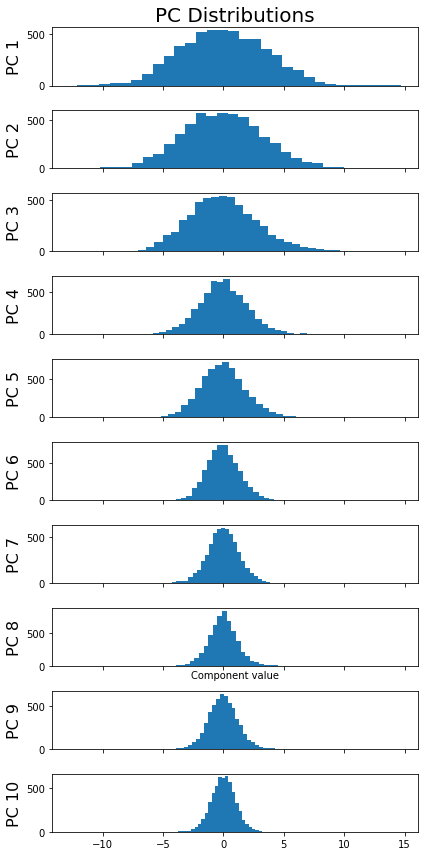

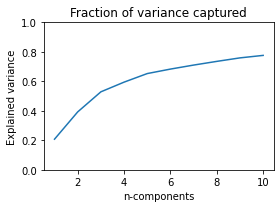

In [10]:

folder_fl = 'D:/Aaron/Data/Chemotaxis/'
data_fl = folder_fl + 'Data_and_Figs/'

########### plot distributions of PCs ###################
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 1, figsize=(6,12), sharex=True)
for i, ax in enumerate(axes[:]):
    ax.hist(df_trans.iloc[:,i].values, 30)
# for i, ax in enumerate(axes[:,1]):
#     ax.hist(nuc_weights[:,i], 30, (-2,2))
    
axes[0].set_title("PC Distributions", fontsize = 20)
# axes[0,1].set_title("Nucleus Distributions", fontsize = 20)
[ax.set_ylabel("PC %i"%(i+1), fontsize = 16) for i, ax in enumerate(axes[:])];
axes[7].set_xlabel("Component value")

plt.tight_layout()
plt.savefig(data_fl+ 'SDSPHARM PC distributions.png', bbox_inches='tight')



# How much variance is explained?
cell_variance = np.cumsum(pca.explained_variance_ratio_)
component_number = np.arange(len(cell_variance)) + 1

# Analysis of explained variance
df_dimred = {}
loading = pca.components_.T * np.sqrt(pca.explained_variance_)
for comp, pc_name in enumerate(pc_names):
    load = loading[:, comp]
    pc = [v for v in load]
    apc = [v for v in np.abs(load)]
    total = np.sum(apc)
    cpc = [100 * v / total for v in apc]
    df_dimred[pc_name] = pc
    df_dimred[pc_name.replace("_PC", "_aPC")] = apc
    df_dimred[pc_name.replace("_PC", "_cPC")] = cpc

# Store results as a dataframe
df_dimred["features"] = coeff_df.columns
df_dimred = pd.DataFrame(df_dimred)
df_dimred = df_dimred.set_index("features", drop=True)

# Plot variance
plt.figure(figsize=(4, 3))
plt.plot(component_number, cell_variance)
plt.ylim(0,1)
plt.xlabel("n-components")
plt.ylabel("Explained variance")
plt.title("Fraction of variance captured")

plt.tight_layout()
plt.savefig(data_fl + 'SDSPHARM Variance captured.png', bbox_inches='tight')



# ######## OR A DIFFERENT PLOT ##############
# # Make plot of explained variance
# plt.plot(100 * pca.explained_variance_ratio_[:npcs_to_calc], "-o")
# title = "Cum. variance: (1+2) = {0}%, Total = {1}%".format(
#     int(100 * pca.explained_variance_ratio_[:2].sum()),
#     int(100 * pca.explained_variance_ratio_[:].sum()),
# )
# plt.xlabel("Component", fontsize=18)
# plt.ylabel("Explained variance (%)", fontsize=18)
# plt.xticks(
#     ticks=np.arange(npcs_to_calc),
#     labels=np.arange(1, 1 + npcs_to_calc),
#     fontsize=14,
# )
# plt.yticks(fontsize=14)
# plt.title(title, fontsize=18)
# plt.tight_layout()



############## SEE WHICH FEATURES ARE MOST IMPORTANT IN EACH PC #############
save = data_fl + 'SDSPHARM Feature_Importance'
# Log feature importance along each PC
with open(f"{save}.txt", "w") as flog:

    for comp in range(npcs):

        print(
            f"\nExamplined variance by PC{comp+1} = {100*pca.explained_variance_ratio_[comp]:.1f}%",
            file=flog,
        )

        # Feature importance is reported in 3 ways:
        # _PC - raw loading
        # _aPC - absolute loading
        # _cPC - normalized cummulative loading
        pc_name = pc_names[comp]
        df_sorted = df_dimred.sort_values(
            by=[pc_name.replace("_PC", "_aPC")], ascending=False
        )
        pca_cum_contrib = np.cumsum(
            df_sorted[pc_name.replace("_PC", "_aPC")].values
            / df_sorted[pc_name.replace("_PC", "_aPC")].sum()
        )
        pca_cum_thresh = np.abs(pca_cum_contrib - 0.80).argmin()
        df_sorted = df_sorted.head(n=pca_cum_thresh + 1)

        print(
            df_sorted[
                [
                    pc_name,
                    pc_name.replace("_PC", "_aPC"),
                    pc_name.replace("_PC", "_cPC"),
                ]
            ].head(),
            file=flog,
        )